In [23]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

### Leitura dos dados e visualização do conteúdo

In [189]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [190]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [179]:
df.shape

(45211, 17)

In [180]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [181]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [194]:
# Trocando os dados binários "sim" e "não" para 1 e 0
df.replace('yes', 1, inplace = True)
df.replace('no', 0, inplace = True)

### Pergunta 1. Qual Profissão tem mais tendência a fazer um empréstimo? De qual tipo?

A profissão que apresenta maior tendência para empréstimo é a "blue-collar", sendo o empréstimo imobiliário (housing) o principal.

In [183]:
emprest = df.groupby(['job']).agg({'age': 'count', 'housing': sum, 'loan': sum})
emprest['total'] = emprest.housing + emprest.loan
emprest['porcentagem'] = emprest.total / emprest.age
emprest.sort_values('porcentagem', ascending = 0, inplace = True)
emprest

,age,housing,loan,total,porcentagem
job,,,,,
blue-collar,9732,7048,1684,8732,0.897246
services,4154,2766,836,3602,0.867116
entrepreneur,1487,869,356,1225,0.823806
admin.,5171,3182,991,4173,0.807001
technician,7597,4115,1309,5424,0.713966
self-employed,1579,765,229,994,0.629512
management,9458,4678,1253,5931,0.627088
unemployed,1303,543,109,652,0.500384
housemaid,1240,398,152,550,0.443548


<AxesSubplot:ylabel='Profissão'>

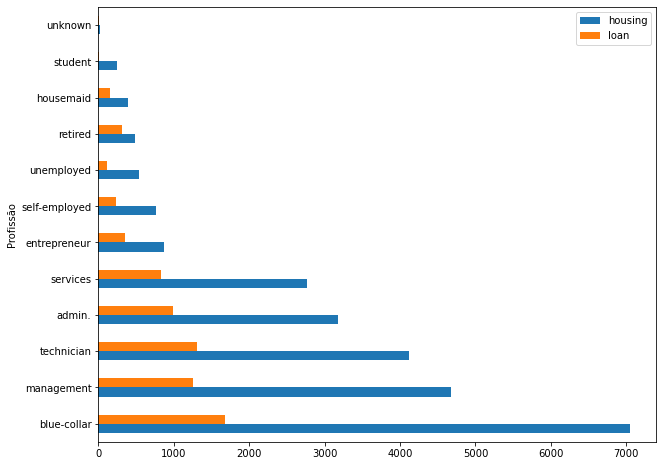

In [171]:
df_emprest = df[['job', 'housing', 'loan']]

df_emprest.groupby(['job']).sum().sort_values(['housing'], ascending = False).plot(kind = 'barh', figsize = (10,8),
                                                                                  xlabel = 'Profissão', 
                                                                                   ylabel = 'Quantidade de empréstimos')

### Pergunta 2. Fazendo uma relação entre número de contatos e sucesso da campanha, quais são os pontos relevantes a serem observados?

Pode-se concluir que o sucesso da campanha está no primeiro e no segundo contato. A medida que a quantidade de contatos aumenta, menor a chance de sucesso.

In [43]:
# casos de sucesso
df_camp = df[(df.y == 1)]
df_camp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
87,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
129,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
168,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [49]:
# quantidade de dados para casos de sucesso
n = df_camp.shape[0]
n

5289

In [48]:
# número de clientes pela quantidade de ligações
df_camp['campaign'].value_counts()

1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
11      16
10      14
13       6
17       6
12       4
14       4
15       4
16       2
21       1
29       1
32       1
24       1
20       1
Name: campaign, dtype: int64

<AxesSubplot:xlabel='Número de ligações', ylabel='% de sucesso'>

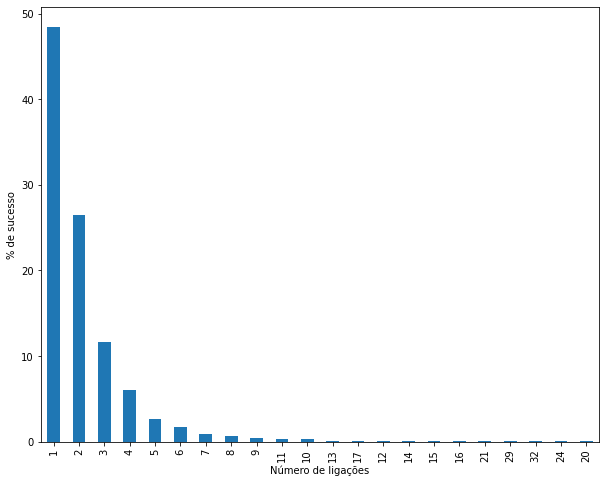

In [63]:
# porcentagem de sucesso por ligação
porc = df_camp['campaign'].value_counts() / n * 100
porc.plot(kind = 'bar', xlabel = 'Número de contatos', ylabel = '% de sucesso', figsize = (10,8))

### Pergunta 3. Baseando-se nos resultados de adesão desta campanha, qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Para otimizar a adesão, a média de contatos seria de 2 ligações, assim como identificado como sendo a média de contatos para clientes que aderiram a campanha. Já o número máximo seria 6, pois a partir de 7 ligações a chance de sucesso é menor do que 1% e com até 6 ligações a chance do cliente aderir chega a 96%.

In [214]:
# porcentagem de sucesso por ligação
porc

1     48.421252
2     26.488939
3     11.684628
4      5.993572
5      2.628096
6      1.739459
7      0.888637
8      0.605029
9      0.397050
11     0.302515
10     0.264700
13     0.113443
17     0.113443
12     0.075629
14     0.075629
15     0.075629
16     0.037814
21     0.018907
29     0.018907
32     0.018907
24     0.018907
20     0.018907
Name: campaign, dtype: float64

In [67]:
df_camp.campaign.describe()

count    5289.000000
mean        2.141047
std         1.921826
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: campaign, dtype: float64

In [68]:
# porcentagem de sucesso para até 6 contatos
sum(df_camp.campaign <= 6) / n

0.9695594630364909

### Pergunta 4. O resultado da campanha anterior tem relevância na campanha atual?

Pode-se observar que um cliente que aderiu a campanha anterior tem cerca de 65% de chance de aderir a nova campanha. Assim, o resultado da campanha anterior apresenta relevância para a campanha atual.

In [97]:
df_relev = pd.crosstab(df['y'], df['poutcome'])
df_relev

poutcome,failure,other,success,unknown
y,,,,
0,4283,1533,533,33573
1,618,307,978,3386


In [100]:
def teorema_bayes(c, x, cross_table):
    'P(c|x) = P(x|c).P(c)/P(x)'
    
    Pc = cross_table.loc[c].sum()/cross_table.sum().sum()
    Px = cross_table[x].sum()/cross_table.sum().sum()
    Pxc = cross_table.loc[c][x]/cross_table.loc[c].sum()
        
    return Pxc*Pc/Px

In [105]:
sucesso_atual = 1
for i in set(df['poutcome']):
    prob = teorema_bayes(sucesso_atual, i, df_relev)
    print("Probabilidade de sucesso atual dado '{}' na campanha anterior: {}".format(i,prob))

Probabilidade de sucesso atual dado 'success' na campanha anterior: 0.6472534745201853
Probabilidade de sucesso atual dado 'unknown' na campanha anterior: 0.09161503287426608
Probabilidade de sucesso atual dado 'failure' na campanha anterior: 0.1260967149561314
Probabilidade de sucesso atual dado 'other' na campanha anterior: 0.1668478260869565


### Pergunta 5. Qual o fator determinante para que o banco exija um seguro de crédito?

O principal fator determinante para exigência do seguro de crédito é o balanço anual do saldo, seguido pela idade. Uma possível explicação para a importância da média do balanço seria que se o cliente não consegue alcançar um balanço anual positivo, ele dificilmente conseguirá pagar o empréstimo.

In [118]:
df_credito = df.iloc[:, :8]

In [121]:
X = df_credito.drop('default', axis = 1)
y = df_credito['default']

# Trasformamos texto para dado numérico
for col in list(set(X.columns)-set(['age', 'balance'])):
    X[col] = pd.factorize(X[col])[0]

In [125]:
model = RandomForestClassifier()
model.fit(X, y)
fatores = pd.Series(model.feature_importances_, index = X.columns)

<AxesSubplot:ylabel='Fatores'>

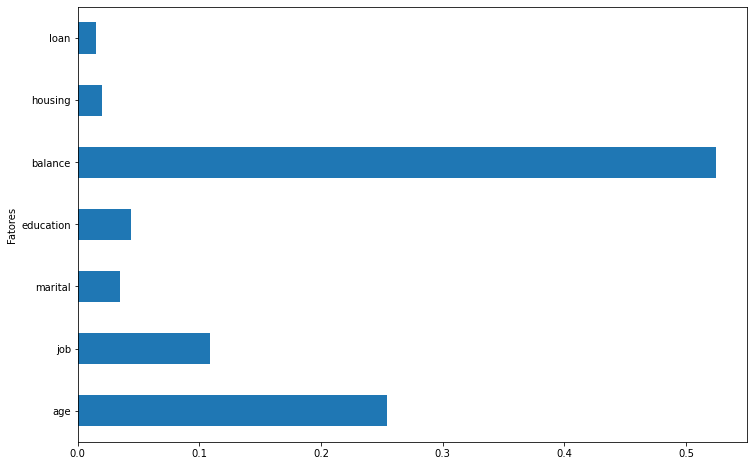

In [133]:
fatores.plot(kind = 'barh', figsize = (12,8), ylabel = 'Fatores')

### Pergunta 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

O perfil do cliente com empréstimo imobiliário apresenta média de 39 anos, trabalho categorizado como "blue-collar", escolaridade de ensino fundamental e estar casado.

In [210]:
df_cliente = df_credito.loc[df['housing'] == 1]
df_cliente.describe()

,age,default,balance,housing,loan
count,25130.000000,25130.000000,25130.000000,25130.0,25130.000000
mean,39.175288,0.017310,1175.103064,1.0,0.173776
std,8.926807,0.130426,2483.285761,0.0,0.378925
min,20.000000,0.000000,-4057.000000,1.0,0.000000
25%,32.000000,0.000000,62.000000,1.0,0.000000
50%,38.000000,0.000000,412.000000,1.0,0.000000
75%,45.000000,0.000000,1257.750000,1.0,0.000000
max,78.000000,1.000000,58544.000000,1.0,1.000000


In [211]:
df_cliente['job'].value_counts()

blue-collar      7048
management       4678
technician       4115
admin.           3182
services         2766
entrepreneur      869
self-employed     765
unemployed        543
retired           491
housemaid         398
student           249
unknown            26
Name: job, dtype: int64

In [212]:
df_cliente['education'].value_counts()

secondary    14038
tertiary      6378
primary       3894
unknown        820
Name: education, dtype: int64

In [213]:
df_cliente['marital'].value_counts()

married     15321
single       6902
divorced     2907
Name: marital, dtype: int64